In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# Importar las bibliotecas necesarias
import psycopg2
import json
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Cargar la configuración de la base de datos desde el archivo JSON
with open('db_config.json', 'r') as file:
    db_config = json.load(file)

# Conectar al servidor de PostgreSQL sin especificar una base de datos
conn = psycopg2.connect(
    host=db_config['host'],
    user=db_config['user'],
    password=db_config['password']
)

# Configurar la conexión para usar el modo de autocommit
conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

# Crear un cursor para ejecutar comandos SQL
cur = conn.cursor()

# Crear la base de datos 'workshop1st'
try:
    cur.execute("CREATE DATABASE workshop1st")
    print("Base de datos 'workshop1st' creada con éxito.")
except psycopg2.Error as e:
    print(f"Error al crear la base de datos: {e}")

# Cerrar la conexión y el cursor
cur.close()
conn.close()





Base de datos 'workshop1st' creada con éxito.


In [95]:
# Cargar la configuración de la base de datos desde el archivo JSON
with open('db_config.json', 'r') as file:
    db_config = json.load(file)

# Conectar a la base de datos 'workshop1st'
conn = psycopg2.connect(
    host=db_config['host'],
    user=db_config['user'],
    password=db_config['password'],
    dbname="workshop1st"
)

# Crear un cursor para ejecutar comandos SQL
cur = conn.cursor()

# Crear la tabla con las columnas especificadas
cur.execute("""
    CREATE TABLE IF NOT EXISTS candidates (
        id SERIAL PRIMARY KEY,
        first_name VARCHAR(20),
        last_name VARCHAR(20),
        email VARCHAR(50),
        application_date DATE,
        country VARCHAR(60),
        yoe INTEGER,
        seniority VARCHAR(15),
        technology VARCHAR(50),
        code_challenge_score INTEGER,
        technical_intrvw_score INTEGER,
        hired BOOLEAN
    )
""")

# Confirmar los cambios en la base de datos
conn.commit()

# Cerrar la conexión y el cursor
cur.close()
conn.close()

print("Tabla creada con éxito.")

Tabla creada con éxito.


In [99]:

# Cargar los datos del CSV en un DataFrame de Pandas
df = pd.read_csv('C:/Users/USUARIO/Desktop/5to Semestre/ETL/WorkShop 1/data.csv')

# Conectar a la base de datos 'workshop1st'
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="Scout104743",
    dbname="workshop1st"
)

# Crear un cursor para ejecutar comandos SQL
cur = conn.cursor()

# Preparar la consulta SQL para insertar datos
insert_query = """
    INSERT INTO candidates (
        first_name, last_name, email, application_date, country, yoe, seniority, technology, code_challenge_score, technical_intrvw_score, hired
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Iterar sobre las filas del DataFrame y ejecutar la consulta SQL para cada fila
for _, row in df.iterrows():
    # Establecer el valor de la columna 'hired' en función de las puntuaciones
    hired = True if row['code_challenge_score'] >= 7 and row['technical_intrvw_score'] >= 7 else False
    
    cur.execute(insert_query, (
        row['first_name'], row['last_name'], row['email'], row['application_date'], row['country'], row['yoe'],
        row['seniority'], row['technology'], row['code_challenge_score'], row['technical_intrvw_score'], hired
    ))

# Confirmar los cambios en la base de datos
conn.commit()

# Cerrar la conexión y el cursor
cur.close()
conn.close()

print("Datos cargados con éxito en la tabla 'candidates'.")

Datos cargados con éxito en la tabla 'candidates'.


In [100]:
# Conectar a la base de datos 'workshop1st'
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="Scout104743",
    dbname="workshop1st"
)

# Crear un cursor para ejecutar comandos SQL
cur = conn.cursor()

# Ejecutar una consulta SQL para seleccionar los primeros 10 registros de la tabla 'candidates'
cur.execute("SELECT * FROM candidates LIMIT 10")

# Obtener los resultados de la consulta
rows = cur.fetchall()

# Crear un DataFrame de Pandas con los resultados de la consulta
df = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])

# Cerrar la conexión y el cursor
cur.close()
conn.close()

# Mostrar el DataFrame
df

,id,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_intrvw_score,hired
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,False
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,False
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,True
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,False
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,True
5,6,Alec,Abbott,juanita_hansen@gmail.com,2019-08-17,Zimbabwe,8,Junior,Adobe Experience Manager,2,9,False
6,7,Allison,Jacobs,alba_rolfson27@yahoo.com,2018-05-18,Wallis and Futuna,19,Trainee,Sales,2,9,False
7,8,Nya,Skiles,madisen.zulauf@gmail.com,2021-12-09,Myanmar,1,Lead,Mulesoft,2,5,False
8,9,Mose,Lakin,dale_murazik@hotmail.com,2018-03-13,Italy,18,Lead,Social Media Community Management,7,10,True
9,10,Terrance,Zieme,dustin31@hotmail.com,2022-04-08,Timor-Leste,25,Lead,DevOps,2,0,False


VISUALIZATION

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16712\48947378.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


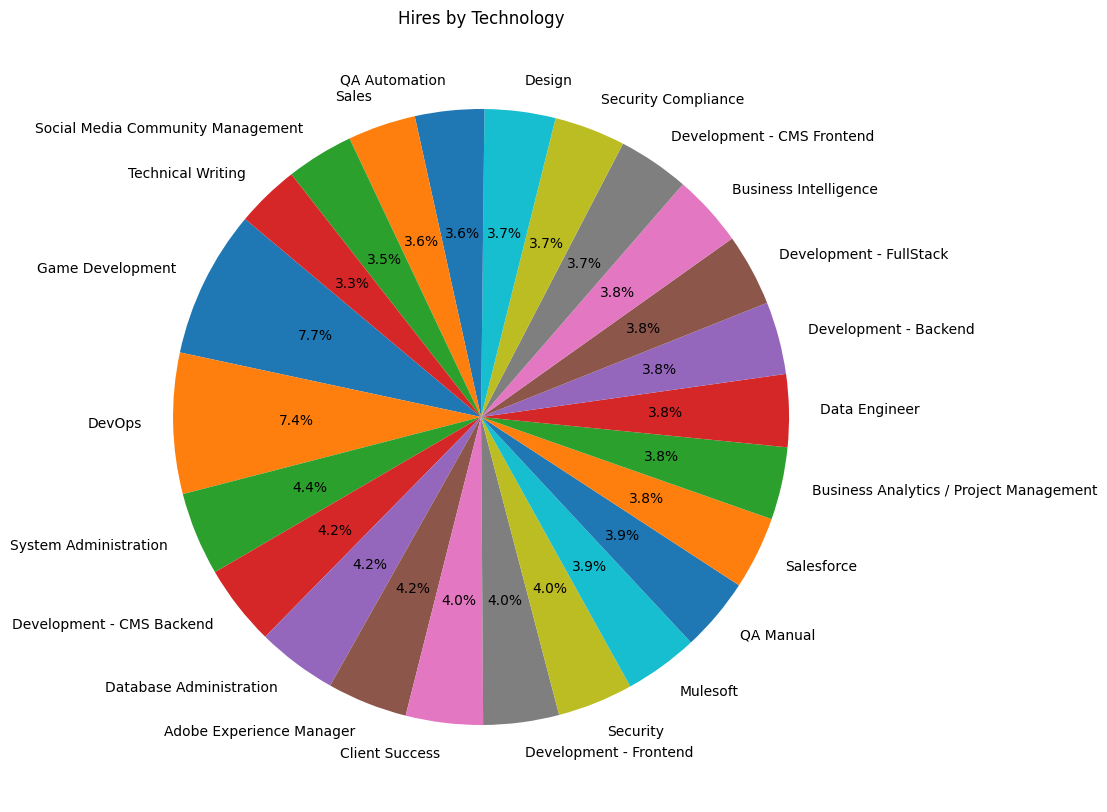

In [137]:

# Conectar a la base de datos 'workshop1st'
conn = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="Scout104743",
    dbname="workshop1st"
)
# Consultar los datos de contrataciones por tecnología
query = """
    SELECT technology, COUNT(*) AS hires
    FROM candidates
    WHERE hired = TRUE
    GROUP BY technology
    ORDER BY hires DESC
"""
df = pd.read_sql(query, conn)

# Crear un gráfico de pastel
plt.figure(figsize=(12, 10))
plt.pie(df['hires'], labels=df['technology'], autopct='%1.1f%%', startangle=140)
plt.title('Hires by Technology')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16712\3075330855.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


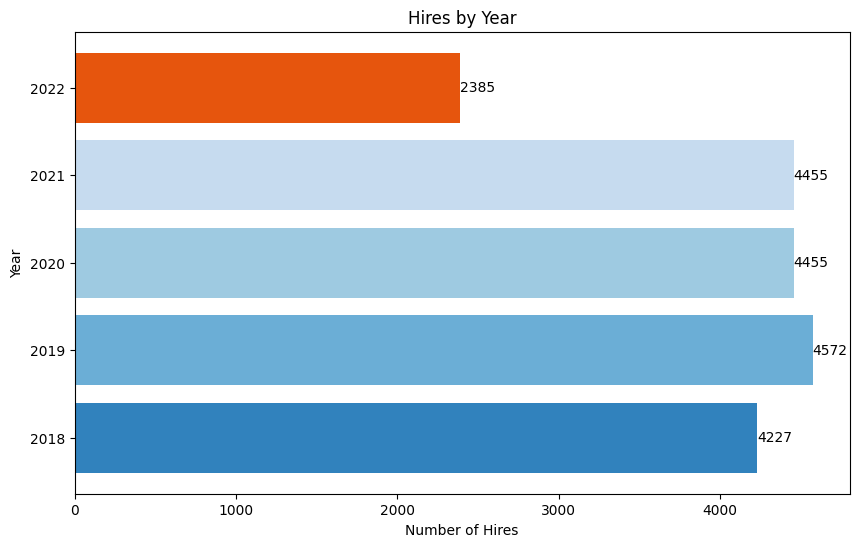

In [135]:
# Consultar los datos de contrataciones por año
query = """
    SELECT EXTRACT(YEAR FROM application_date) AS year, COUNT(*) AS hires
    FROM candidates
    WHERE hired = TRUE
    GROUP BY year
    ORDER BY year
"""
df = pd.read_sql(query, conn)



# Crear un gráfico de barras horizontales con colores distintos para cada año
plt.figure(figsize=(10, 6))
bars = plt.barh(df['year'], df['hires'], color=plt.cm.tab20c.colors)

# Mostrar la cantidad al extremo de cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Number of Hires')
plt.ylabel('Year')
plt.title('Hires by Year')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16712\3833728098.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


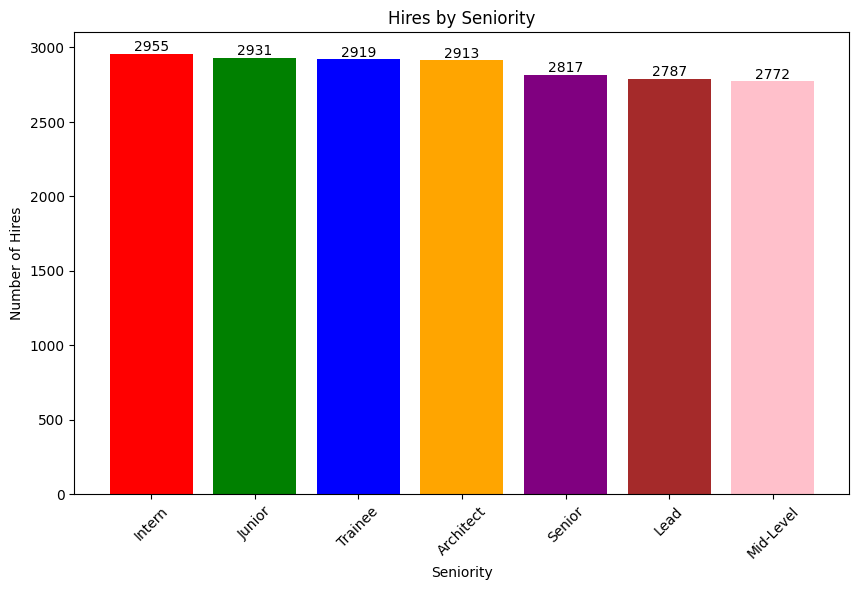

In [131]:
# Consultar los datos de contrataciones por seniority
query = """
    SELECT seniority, COUNT(*) AS hires
    FROM candidates
    WHERE hired = TRUE
    GROUP BY seniority
    ORDER BY hires DESC
"""
df = pd.read_sql(query, conn)

# Lista de colores para las barras
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Crear un gráfico de barras con colores distintos para cada barra
plt.figure(figsize=(10, 6))
bars = plt.bar(df['seniority'], df['hires'], color=colors[:len(df)])
plt.xlabel('Seniority')
plt.ylabel('Number of Hires')
plt.title('Hires by Seniority')
plt.xticks(rotation=45)

# Añadir la cantidad en cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16712\3392603107.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


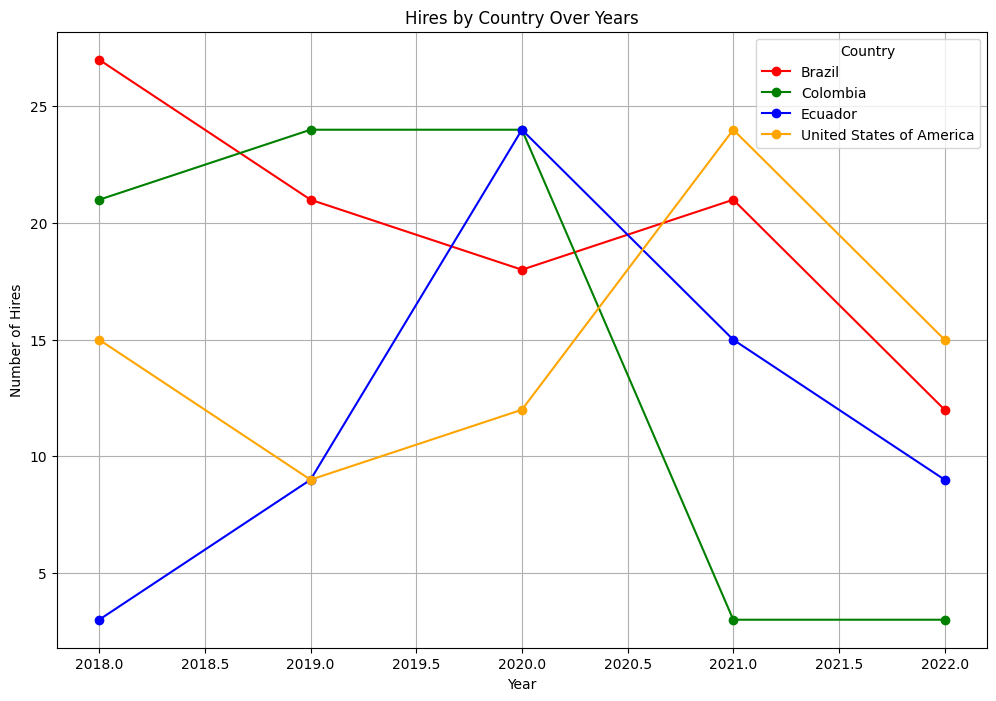

In [133]:
# Consultar los datos de contrataciones por país y año
query = """
    SELECT EXTRACT(YEAR FROM application_date) AS year, country, COUNT(*) AS hires
    FROM candidates
    WHERE hired = TRUE AND country IN ('United States of America', 'Brazil', 'Colombia', 'Ecuador')
    GROUP BY year, country
    ORDER BY year, country
"""
df = pd.read_sql(query, conn)



# Pivotear los datos para tener los años en las filas y los países en las columnas
pivot_df = df.pivot(index='year', columns='country', values='hires').fillna(0)

# Lista de colores para las líneas
colors = ['red', 'green', 'blue', 'orange']

# Crear un gráfico de líneas múltiples
plt.figure(figsize=(12, 8))
for i, country in enumerate(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[country], label=country, color=colors[i], marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('Hires by Country Over Years')
plt.legend(title='Country')
plt.grid(True)
plt.show()